In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import cbx as cbx
from cbx.dynamics import CBO
from cbx.objectives import Rastrigin
import cbx.utils.termination as term
from cbx.scheduler import effective_sample_size
from cbx.plotting import plot_dynamic, plot_dynamic_history
import matplotlib.pyplot as plt

# Define the parameters

In [2]:
conf = {'alpha': 40.0,
        'dt': 0.1,
        'sigma': 1.,
        'lamda': 1.0,
        'batch_args':{
        'batch_size':200,
        'batch_partial': False},
        'd': 2,
        'term_criteria':[term.max_it_term(50)],
        'N': 50,
        'M': 3,
        'track_args': {'names':
                       ['update_norm', 
                        'energy','x', 
                        'consensus', 
                        'drift']},}

# Define the initial positions of the particles and objective function

In [3]:
x = cbx.utils.init_particles(shape=(conf['M'], conf['N'], conf['d']), x_min=-2., x_max = 1.)
f = Rastrigin()

# Define the dynamic and scheduler

In [5]:
dyn = CBO(f, x=x, noise='isotropic', f_dim='3D', 
          **conf)
sched = effective_sample_size(name='alpha', eta = 0.1)

# Run the CBO algorithm

In [6]:
dyn.optimize(sched=sched)

....................
Starting Optimization with dynamic: CBO
....................
Time: 0.100, best current energy: [1.19535975 1.0791095  0.38837126]
Number of function evaluations: [100 100 100]
Time: 0.200, best current energy: [1.19535975 0.36670417 0.38837126]
Number of function evaluations: [150 150 150]
Time: 0.300, best current energy: [1.19535975 0.36670417 0.38837126]
Number of function evaluations: [200 200 200]
Time: 0.400, best current energy: [0.04885167 0.36670417 0.38837126]
Number of function evaluations: [250 250 250]
Time: 0.500, best current energy: [0.04885167 0.36670417 0.38837126]
Number of function evaluations: [300 300 300]
Time: 0.600, best current energy: [0.04885167 0.18033366 0.38837126]
Number of function evaluations: [350 350 350]
Time: 0.700, best current energy: [0.04885167 0.02601984 0.01349044]
Number of function evaluations: [400 400 400]
Time: 0.800, best current energy: [0.04885167 0.02601984 0.01349044]
Number of function evaluations: [450 450 450

array([[ 1.10962572e-04,  2.14121174e-05],
       [ 1.57898740e-05,  1.16345707e-04],
       [ 1.04366551e-04, -1.64954804e-04]])

In [69]:
cbx.scheduler.bisection_solve(gap, 0*np.ones(3,), 100000000*np.ones(3,))

array([0.0003638 , 0.0007276 , 0.00145519])

In [65]:
gap(100000*np.ones(3,))

array([-22.32466366, -22.10736272, -19.85043089])

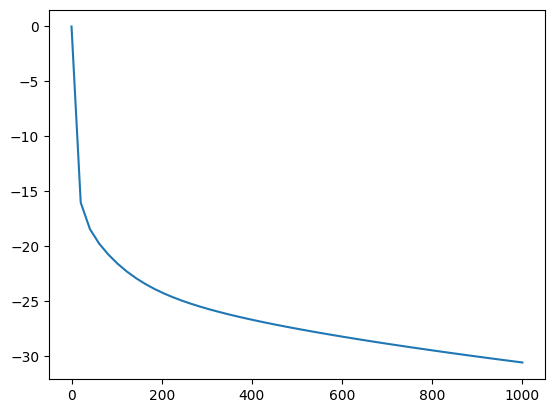

In [67]:
gap = cbx.scheduler.eff_sample_size_gap(dyn.energy, 1.)
b = []
g = np.linspace(0,1000)
for a in g:
    b.append(gap(np.ones(3,)*a)[0])
plt.plot(g,b)

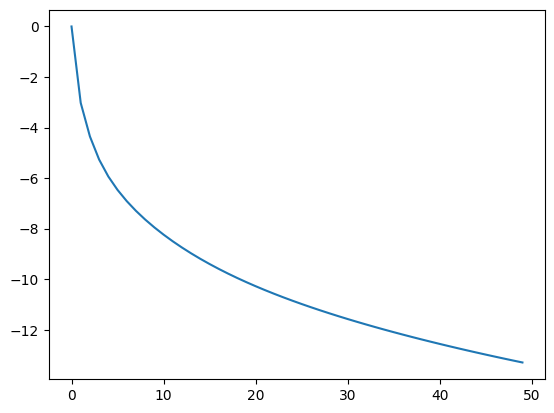